In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
seed = 38
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
train_df = pd.read_csv("mitbih_train.csv", header=None)
test_df = pd.read_csv("mitbih_test.csv", header=None)

x_train = train_df.iloc[:, :-1]  
y_train = train_df.iloc[:, -1]  

x_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

# escalar datos
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

train_df_scaled = pd.DataFrame(x_train_scaled)
train_df_scaled['label'] = y_train.values

test_df_scaled = pd.DataFrame(x_test_scaled)
test_df_scaled['label'] = y_test.values

# separar por clase
x_train_0 = train_df_scaled[train_df_scaled['label'] == 0].iloc[:, :-1]
x_train_1 = train_df_scaled[train_df_scaled['label'] == 1].iloc[:, :-1]
x_train_2 = train_df_scaled[train_df_scaled['label'] == 2].iloc[:, :-1]
x_train_3 = train_df_scaled[train_df_scaled['label'] == 3].iloc[:, :-1]
x_train_4 = train_df_scaled[train_df_scaled['label'] == 4].iloc[:, :-1]

x_test_0 = test_df_scaled[test_df_scaled['label'] == 0].iloc[:, :-1]
x_test_1 = test_df_scaled[test_df_scaled['label'] == 1].iloc[:, :-1]
x_test_2 = test_df_scaled[test_df_scaled['label'] == 2].iloc[:, :-1]
x_test_3 = test_df_scaled[test_df_scaled['label'] == 3].iloc[:, :-1]
x_test_4 = test_df_scaled[test_df_scaled['label'] == 4].iloc[:, :-1]

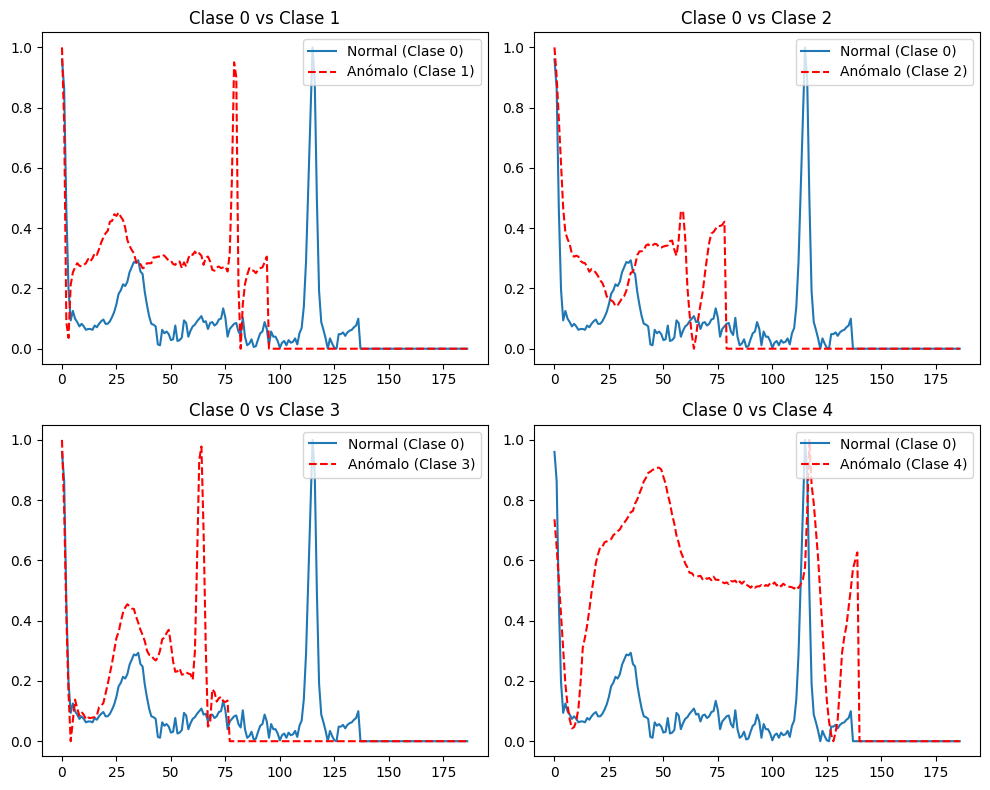

In [5]:
ind = 1
normal = x_train_0.iloc[ind].values
anormal_1 = x_test_1.iloc[ind].values
anormal_2 = x_test_2.iloc[ind].values
anormal_3 = x_test_3.iloc[ind].values
anormal_4 = x_test_4.iloc[ind].values

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(normal, label='Normal (Clase 0)')
plt.plot(anormal_1, 'r--', label='Anómalo (Clase 1)')
plt.title("Clase 0 vs Clase 1")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(normal, label='Normal (Clase 0)')
plt.plot(anormal_2, 'r--', label='Anómalo (Clase 2)')
plt.title("Clase 0 vs Clase 2")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(normal, label='Normal (Clase 0)')
plt.plot(anormal_3, 'r--', label='Anómalo (Clase 3)')
plt.title("Clase 0 vs Clase 3")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(normal, label='Normal (Clase 0)')
plt.plot(anormal_4, 'r--', label='Anómalo (Clase 4)')
plt.title("Clase 0 vs Clase 4")
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
dim_entrada = 187
entrada = Input(shape=(dim_entrada,))


encoder = Dense(128, activation='relu')(entrada)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(32, activation='relu')(encoder)
encoder = Dense(16, activation='relu')(encoder)  
decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(128, activation='relu')(decoder)

decoder = Dense(dim_entrada, activation='sigmoid')(decoder)

autoencoder = Model(inputs=entrada, outputs=decoder)
# autoencoder.summary()

In [7]:
autoencoder.compile(optimizer='adam', loss='mae')

historia = autoencoder.fit(
    x_train_0, x_train_0,
    epochs=200,
    batch_size=512,
    validation_data=(x_test_0, x_test_0),
    shuffle=True
)

Epoch 1/200
142/142 [==============================] - 1s 3ms/step - loss: 0.1422 - val_loss: 0.0650
Epoch 2/200
142/142 [==============================] - 0s 2ms/step - loss: 0.0554 - val_loss: 0.0472
Epoch 3/200
142/142 [==============================] - 0s 3ms/step - loss: 0.0440 - val_loss: 0.0417
Epoch 4/200
142/142 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0394
Epoch 5/200
142/142 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0374
Epoch 6/200
142/142 [==============================] - 0s 3ms/step - loss: 0.0367 - val_loss: 0.0364
Epoch 7/200
142/142 [==============================] - 0s 3ms/step - loss: 0.0355 - val_loss: 0.0352
Epoch 8/200
142/142 [==============================] - 0s 3ms/step - loss: 0.0346 - val_loss: 0.0340
Epoch 9/200
142/142 [==============================] - 0s 3ms/step - loss: 0.0338 - val_loss: 0.0333
Epoch 10/200
142/142 [==============================] - 0s 3ms/step - loss: 0.0330 - val_lo

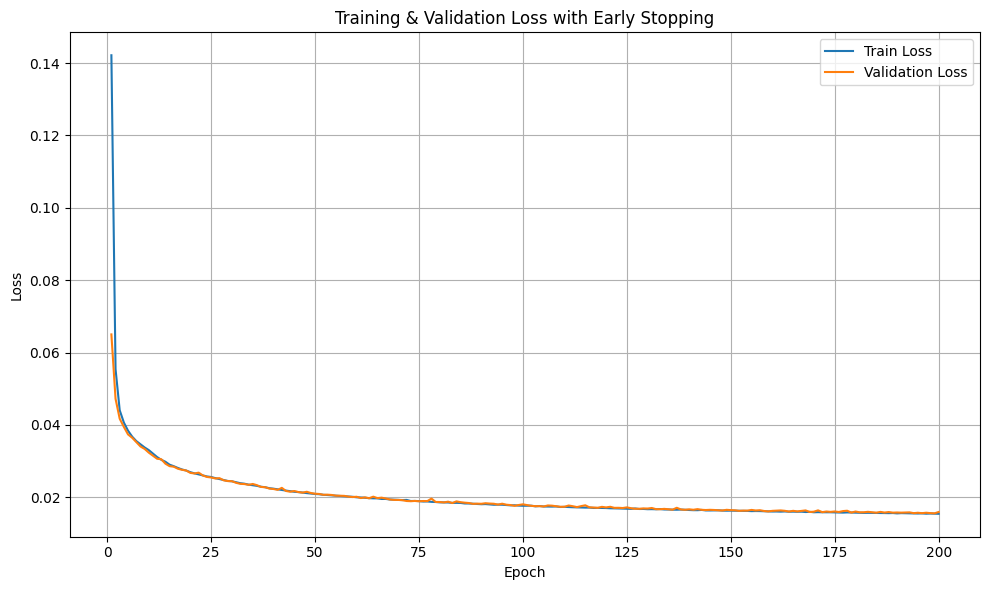

In [8]:
train_losses = historia.history['loss']
val_losses = historia.history['val_loss']

plt.figure(figsize=(10,6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss with Early Stopping")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
autoencoder.save('ecg_model_autoencoder.h5')

c:\Users\matia\Documents\codigoCosas\proyectoPortafolio\entrega_2\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


567/567 [==============================] - 0s 485us/step


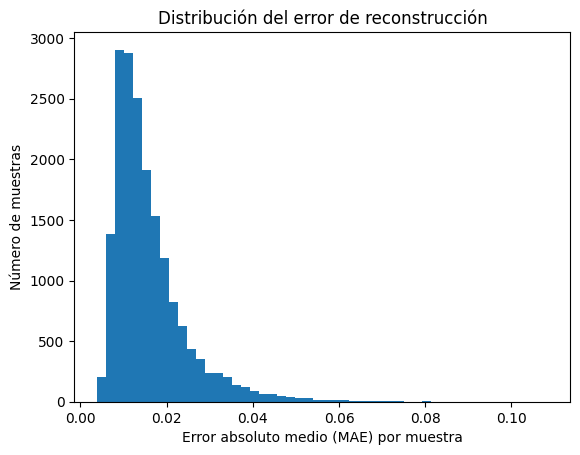

Error MAE muestra 0: 0.008742648586075421 - Anómalo predicho: False
Error MAE muestra 1: 0.027971421364820004 - Anómalo predicho: True
Error MAE muestra 2: 0.021771660566952792 - Anómalo predicho: False
Error MAE muestra 3: 0.00930177811105066 - Anómalo predicho: False
Error MAE muestra 4: 0.033225404184970206 - Anómalo predicho: True


In [10]:
reconstructions = autoencoder.predict(x_test_0)

mae = np.mean(np.abs(reconstructions - x_test_0), axis=1)

plt.hist(mae, bins=50)
plt.xlabel('Error absoluto medio (MAE) por muestra')
plt.ylabel('Número de muestras')
plt.title('Distribución del error de reconstrucción')
plt.show()

umbral = 0.025

anomalo_predicho = mae > umbral

for i in range(5):
    print(f"Error MAE muestra {i}: {mae[i]} - Anómalo predicho: {anomalo_predicho[i]}")


51/51 [==============================] - 0s 491us/step


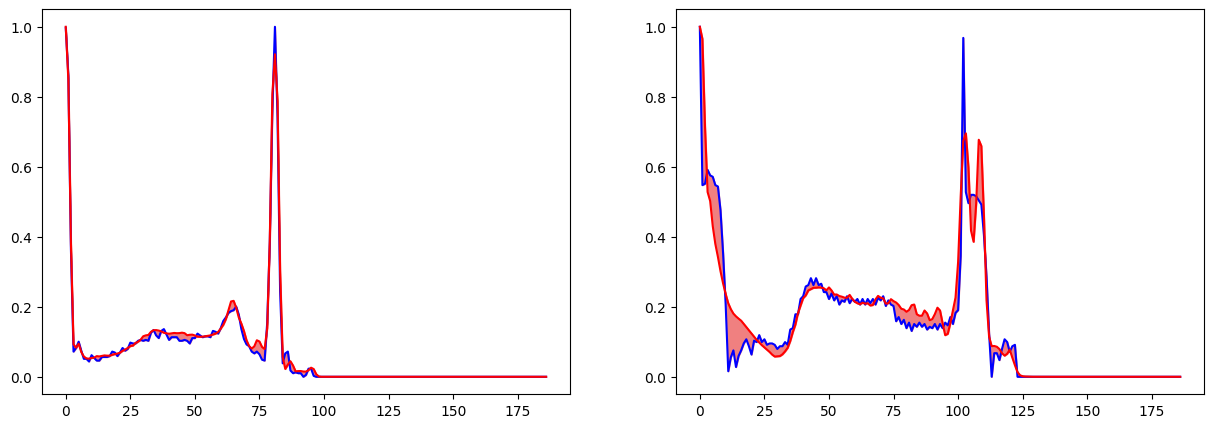

In [11]:
rec_normal = autoencoder.predict(x_test_0)
rec_anormal = autoencoder.predict(x_test_4)

dato = 10

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(x_test_0.iloc[dato], 'b')          # <-- usar iloc para filas
plt.plot(rec_normal[dato], 'r')
plt.fill_between(np.arange(187), rec_normal[dato], x_test_0.iloc[dato], color='lightcoral')

plt.subplot(1, 2, 2)
plt.plot(x_test_4.iloc[dato], 'b')
plt.plot(rec_anormal[dato], 'r')
plt.fill_between(np.arange(187), rec_anormal[dato], x_test_4.iloc[dato], color='lightcoral')

plt.show()


51/51 [==============================] - 0s 481us/step


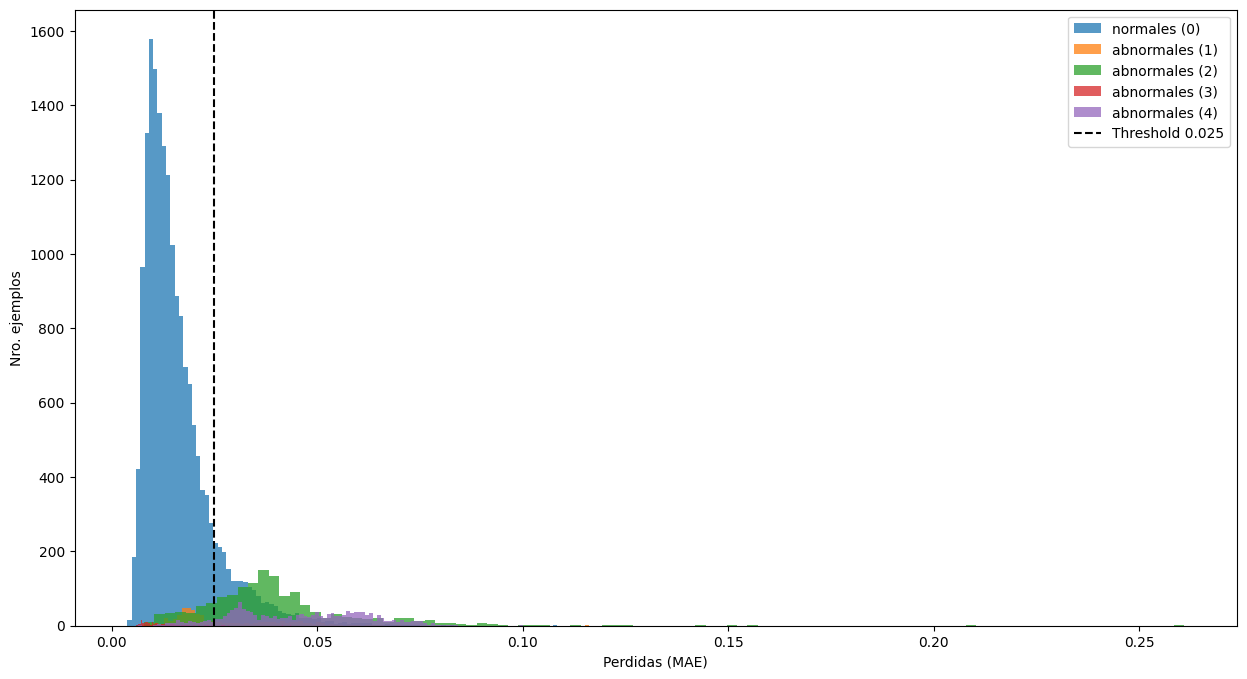

In [12]:
rec_0 = autoencoder.predict(x_test_0)
rec_1 = autoencoder.predict(x_test_1)
rec_2 = autoencoder.predict(x_test_2)
rec_3 = autoencoder.predict(x_test_3)
rec_4 = autoencoder.predict(x_test_4)

loss_0 = tf.keras.losses.mae(rec_0, x_test_0)
loss_1 = tf.keras.losses.mae(rec_1, x_test_1)
loss_2 = tf.keras.losses.mae(rec_2, x_test_2)
loss_3 = tf.keras.losses.mae(rec_3, x_test_3)
loss_4 = tf.keras.losses.mae(rec_4, x_test_4)

plt.figure(figsize=(15,8))
plt.hist(loss_0[None,:], bins=100, alpha=0.75, label='normales (0)')
plt.hist(loss_1[None,:], bins=100, alpha=0.75, label='abnormales (1)')
plt.hist(loss_2[None,:], bins=100, alpha=0.75, label='abnormales (2)')
plt.hist(loss_3[None,:], bins=100, alpha=0.75, label='abnormales (3)')
plt.hist(loss_4[None,:], bins=100, alpha=0.75, label='abnormales (4)')

plt.axvline(umbral, color='k', linestyle='--', label=f'Threshold {umbral:.3f}')
plt.xlabel('Perdidas (MAE)')
plt.ylabel('Nro. ejemplos')
plt.legend()
plt.show()

In [13]:
def calcular_sensitividad(prediccion, titulo):
    TP = np.count_nonzero(~prediccion)
    FN = np.count_nonzero(prediccion)
    sen = 100*(TP/(TP+FN))
    
    print(titulo + ': {:.1f}%' .format(sen))

def calcular_especificidad(prediccion, titulo):
    TN = np.count_nonzero(prediccion)
    FP = np.count_nonzero(~prediccion)
    esp = 100*(TN/(TN+FP))
    
    print(titulo + ': {:.1f}%' .format(esp))
    return esp

def predecir(modelo, datos, umbral):
    datos_np = datos.values.astype(np.float32)  
    reconstrucciones = modelo.predict(datos_np) 
    perdida = tf.keras.losses.mae(reconstrucciones, datos_np)
    return tf.math.less(perdida, umbral)

In [14]:
pred_0 = predecir(autoencoder, x_test_0, umbral)
pred_1 = predecir(autoencoder, x_test_1, umbral)
pred_2 = predecir(autoencoder, x_test_2, umbral)
pred_3 = predecir(autoencoder, x_test_3, umbral)
pred_4 = predecir(autoencoder, x_test_4, umbral)

esp_0 = calcular_especificidad(pred_0,'Especificidad (cat. 0, normales)')

sen_1 = calcular_sensitividad(pred_1,'Sensitividad (cat. 1, abnormales)')
sen_2 = calcular_sensitividad(pred_2,'Sensitividad (cat. 2, abnormales)')
sen_3 = calcular_sensitividad(pred_3,'Sensitividad (cat. 3, abnormales)')
sen_4 = calcular_sensitividad(pred_4,'Sensitividad (cat. 4, abnormales)')

51/51 [==============================] - 0s 505us/step
Especificidad (cat. 0, normales): 88.3%
Sensitividad (cat. 1, abnormales): 40.8%
Sensitividad (cat. 2, abnormales): 83.1%
Sensitividad (cat. 3, abnormales): 3.1%
Sensitividad (cat. 4, abnormales): 91.2%
